Group Name: Profit\
Name: Jinghao Shen\
Email: jshen30@ucsc.edu\
Country: United States\
College/Company: University of California, Santa Cruz\
Specialization: Data Science\
Date: 11/02/2023


### Evalution
#### To check the performance of the model, we will be using the f1 score as the metric, not accuracy.
We will get high accuracy score because the model is biased towards the majority class.\
However, it will not serve any value to our problem statement.\
Therefore, we will be using f1 score as f1 score is the harmonic mean of precision and recall.

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

bank_info = pd.read_csv("./data/bank-full-cleaned.csv",sep=';')
bank_no_duration = pd.read_csv("./data/bank-no-duration.csv",sep=';')

In [44]:
# split data to independent and dependent variables
x = bank_info.iloc[:, :-1]
y = bank_info.iloc[:, -1]

x_nd = bank_no_duration.iloc[:, :-1]
y_nd = bank_no_duration.iloc[:, -1]

Class=0, n=39922 (88.302%)
Class=1, n=5289 (11.698%)


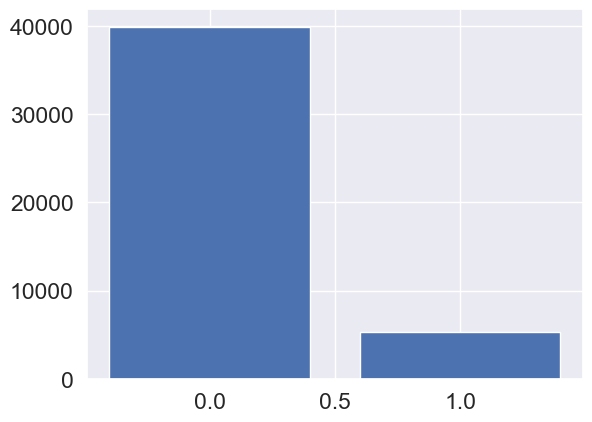

In [38]:
# Approach 1: class balanced weight logistic regression

# Number of samples in each classes
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.show()

In [45]:
# util functions
def calculate_class_weights(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    total_samples = len(y)
    class_weights = {}

    for class_label, class_count in zip(unique_classes, class_counts):
        class_weight = total_samples / (2.0 * class_count)
        class_weights[class_label] = class_weight

    return class_weights

class_weights = calculate_class_weights(y)
print("Class weights:", class_weights)

def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

Class weights: {0: 0.566241671258955, 1: 4.274059368500661}


In [46]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_nd_train, x_nd_test, y_nd_train, y_nd_test = train_test_split(x_nd, y_nd, test_size=0.2, random_state=0)

Logistic regression model accuracy: 0.8880902355413026
The f1 score for the model is: 0.3039889958734525


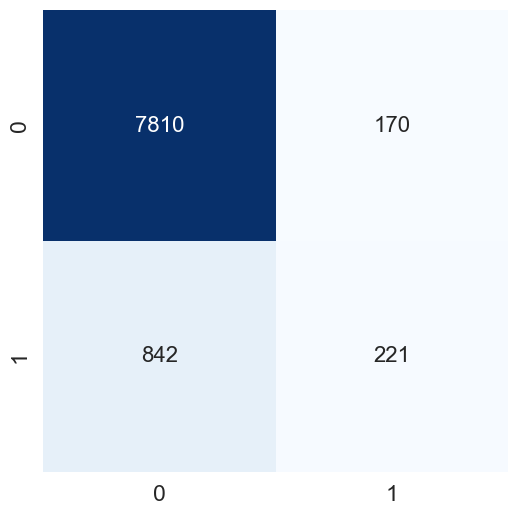

In [26]:
# logistic regression
classifier = LogisticRegression(solver='newton-cg', max_iter=200)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print("Logistic regression model accuracy:", accuracy_score(y_test,y_pred)) 
print('The f1 score for the model is:',f1_score(y_test, y_pred))

#Ploting the cunfusion matrix
conf_matrix(y_test, y_pred)

Logistic regression model accuracy: 0.8836669246931328
The f1 score for the model is: 0.027726432532347505


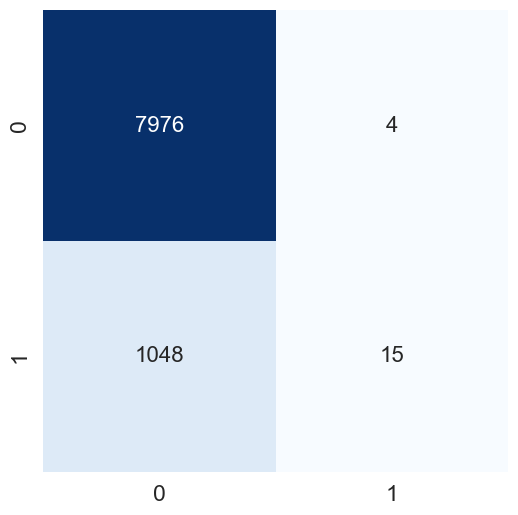

In [47]:
# logistic regression no duration
classifier = LogisticRegression(solver='newton-cg', max_iter=200)
classifier.fit(x_nd_train, y_nd_train)

y_nd_pred = classifier.predict(x_nd_test)


print("Logistic regression model accuracy:", accuracy_score(y_nd_test,y_nd_pred)) 
print('The f1 score for the model is:',f1_score(y_nd_test, y_nd_pred))

#Ploting the cunfusion matrix
conf_matrix(y_nd_test, y_nd_pred)

Logistic regression model accuracy: 0.7979652770098419
The f1 score for the model is: 0.4757532281205165


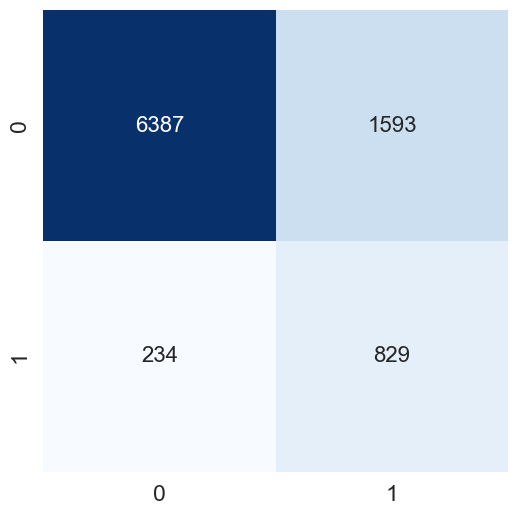

In [28]:
# logistic regression with weight
classifier = LogisticRegression(solver='newton-cg', class_weight='balanced')
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print("Logistic regression model accuracy:", accuracy_score(y_test,y_pred)) 
print('The f1 score for the model is:',f1_score(y_test, y_pred))

#Ploting the cunfusion matrix
conf_matrix(y_test, y_pred)

Logistic regression model accuracy: 0.6411589074422205
The f1 score for the model is: 0.31089403270333404


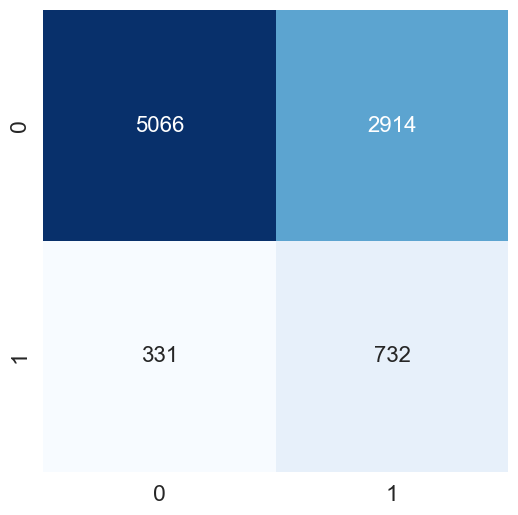

In [29]:
# logistic regression no duration with weight
classifier = LogisticRegression(solver='newton-cg', max_iter=200, class_weight='balanced')
classifier.fit(x_nd_train, y_nd_train)

y_nd_pred = classifier.predict(x_nd_test)


print("Logistic regression model accuracy:", accuracy_score(y_nd_test,y_nd_pred)) 
print('The f1 score for the model is:',f1_score(y_nd_test, y_nd_pred))

#Ploting the cunfusion matrix
conf_matrix(y_nd_test, y_nd_pred)

Class=0, n=39922 (50.000%)
Class=1, n=39922 (50.000%)


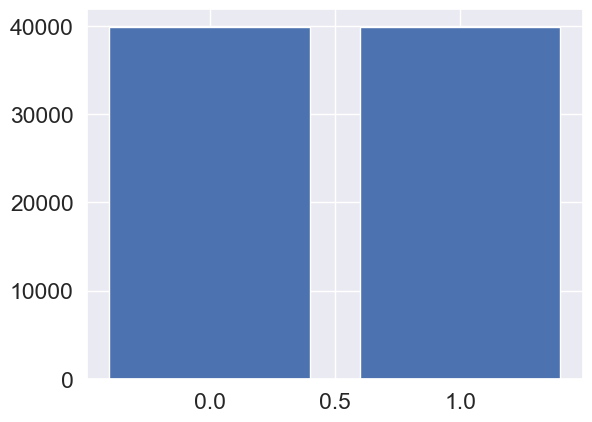

In [39]:
# Approach 2: Oversampling

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(x, y)
X_nd, y_nd = oversample.fit_resample(x_nd, y_nd)

# Number of samples in each classes
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.show()

In [40]:
# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
x_nd_train, x_nd_test, y_nd_train, y_nd_test = train_test_split(X_nd, y_nd, test_size=0.2, random_state=0)

Logistic regression model accuracy: 0.8564719143340221
The f1 score for the model is: 0.861326234269119


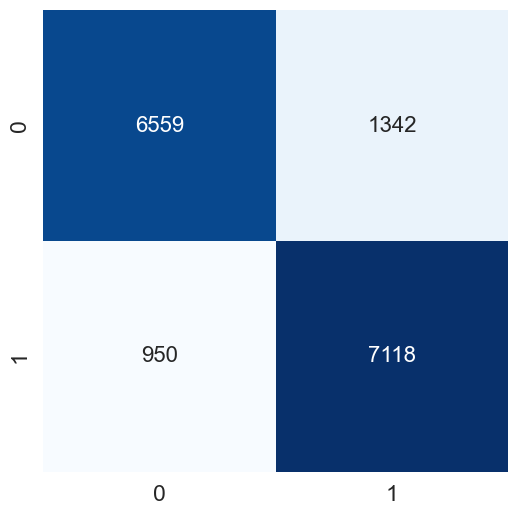

In [42]:
# logistic regression
classifier = LogisticRegression(solver='newton-cg', max_iter=200)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print("Logistic regression model accuracy:", accuracy_score(y_test,y_pred)) 
print('The f1 score for the model is:',f1_score(y_test, y_pred))

#Ploting the cunfusion matrix
conf_matrix(y_test, y_pred)

Logistic regression model accuracy: 0.7644185609618636
The f1 score for the model is: 0.7758579599618686


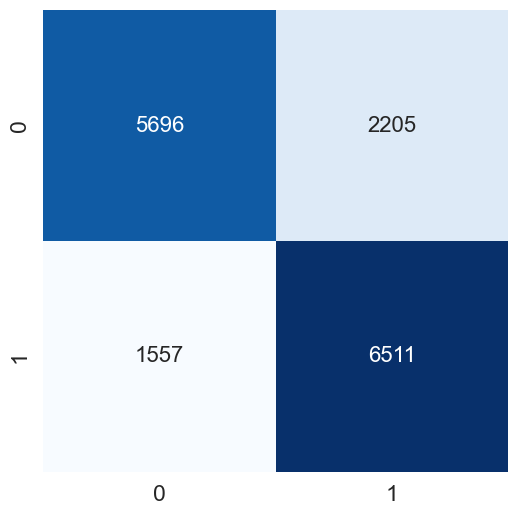

In [41]:
# logistic regression no duration
classifier = LogisticRegression(solver='newton-cg', max_iter=200)
classifier.fit(x_nd_train, y_nd_train)

y_nd_pred = classifier.predict(x_nd_test)


print("Logistic regression model accuracy:", accuracy_score(y_nd_test,y_nd_pred)) 
print('The f1 score for the model is:',f1_score(y_nd_test, y_nd_pred))

#Ploting the cunfusion matrix
conf_matrix(y_nd_test, y_nd_pred)